<p style="text-align:right;">
    <em>Content Copyrighted by Puneett Bhatnagr</em>
</p>

# Time Series Analysis with Python
___

Time series is a sequence of observations recorded over a time intervals.

Depending on the frequency of observations, a time series may typically be hourly, daily, weekly, monthly, quarterly and annual. Sometimes, it is also possible to have seconds and minute-wise time series as well, like, number of clicks and user visits every minute etc.

Time series analysis involves understanding various aspects of the inherent nature of the series so that you are better informed to create meaningful and accurate future forecasts.

In this project, you will learn how to work with time series data. You will get to know how to:

- Source your data
- Wrangle your data
- Exploratory Data Analysis
- Trends and seasonality in time series data
- Identifying Trends
- Seasonal patterns
- First Order Differencing
- Periodicity and Autocorrelation


## Import The Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('multiTimeline.csv', skiprows=1)
df.head()

,Week,covid: (Worldwide),hospital: (Worldwide),Vaccine: (Worldwide),Lockdown: (Worldwide)
0,2016-06-05,0,11,2,<1
1,2016-06-12,<1,11,2,<1
2,2016-06-19,0,11,2,<1
3,2016-06-26,0,11,2,<1
4,2016-07-03,0,11,2,<1


In [4]:
df.columns = ['week', 'covid19', 'hospital','vaccine', 'lockdown']
df.head()

,week,covid19,hospital,vaccine,lockdown
0,2016-06-05,0,11,2,<1
1,2016-06-12,<1,11,2,<1
2,2016-06-19,0,11,2,<1
3,2016-06-26,0,11,2,<1
4,2016-07-03,0,11,2,<1


In [5]:
df.month = pd.to_datetime(df.week)
df.set_index('week', inplace=True)

<ipython-input-5-d3588b00a037>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.month = pd.to_datetime(df.week)


In [6]:
df.head()

,covid19,hospital,vaccine,lockdown
week,,,,
2016-06-05,0,11,2,<1
2016-06-12,<1,11,2,<1
2016-06-19,0,11,2,<1
2016-06-26,0,11,2,<1
2016-07-03,0,11,2,<1


In [7]:
df['covid19']= df['covid19'].replace('<1',0)
df['lockdown']= df['lockdown'].replace('<1',0)
df.head()

,covid19,hospital,vaccine,lockdown
week,,,,
2016-06-05,0,11,2,0
2016-06-12,0,11,2,0
2016-06-19,0,11,2,0
2016-06-26,0,11,2,0
2016-07-03,0,11,2,0


In [8]:
df.tail()

,covid19,hospital,vaccine,lockdown
week,,,,
2021-04-25,85,16,55,6
2021-05-02,77,16,54,6
2021-05-09,71,15,59,5
2021-05-16,69,14,58,4
2021-05-23,70,14,59,5


In [9]:
df.dtypes

covid19     object
hospital     int64
vaccine      int64
lockdown    object
dtype: object

In [10]:
df['covid19']=df['covid19'].astype(int)
df['lockdown']=df['lockdown'].astype(int)

## Let's Check The Trend Of Covid19 Search On Google Overtime.

We will use the average of the last 12 data points to check the trend. We will use a technique called rolling average.

A simple rolling average (also called a moving average) is the unweighted mean of the last n values.



Text(0.5, 0, 'Year')

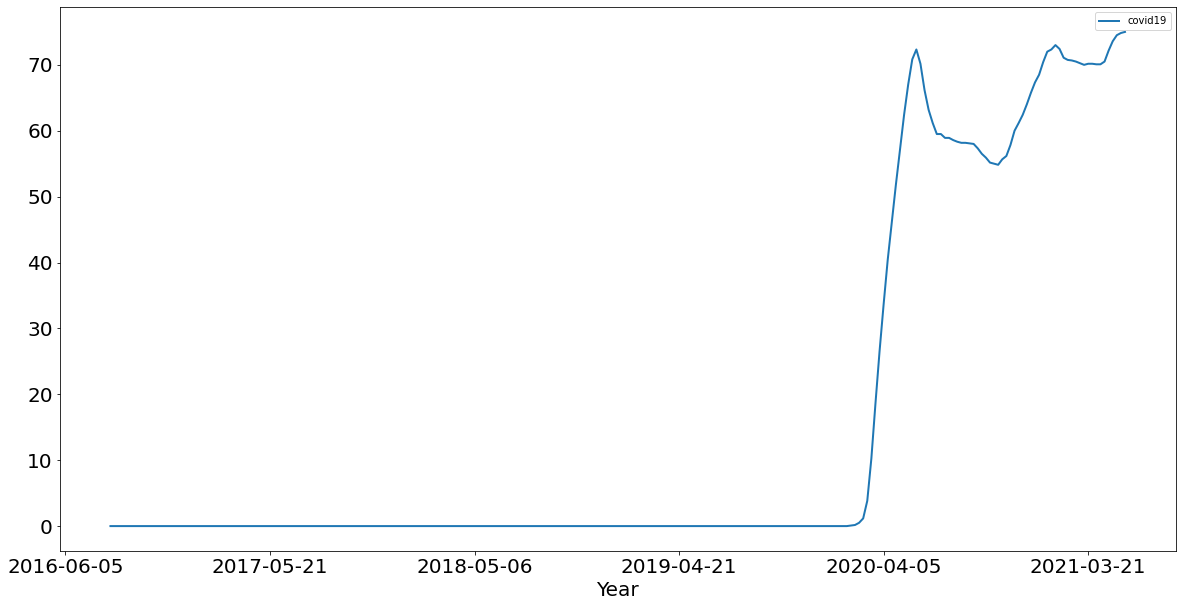

In [11]:
covid = df[['covid19']]
covid.rolling(12).mean().plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20)

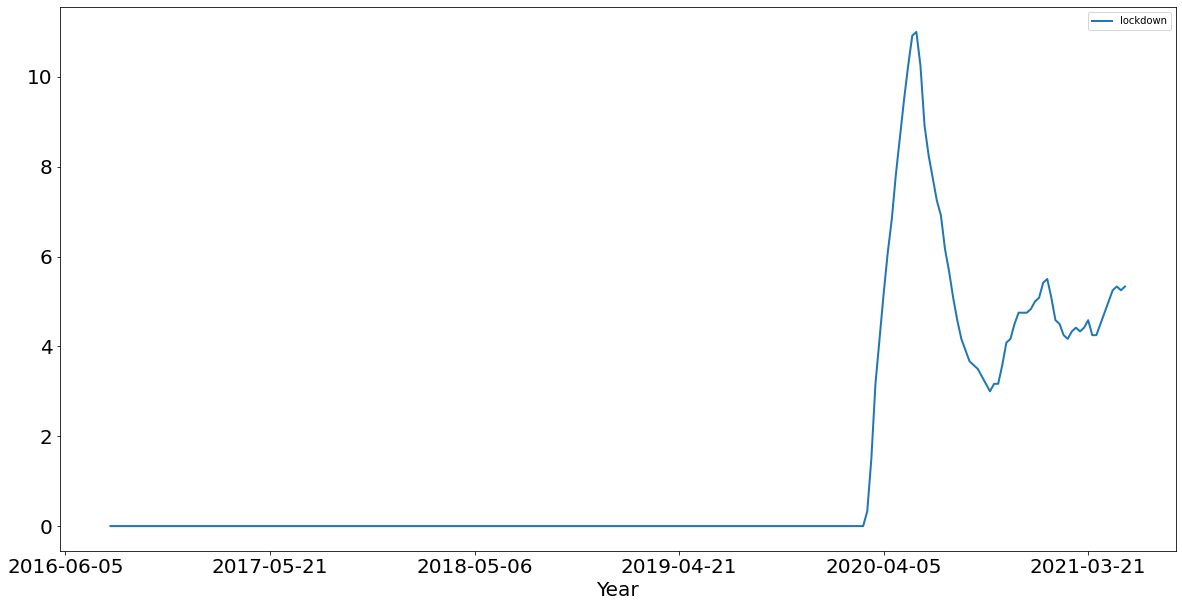

In [12]:
lockdown = df[['lockdown']]
lockdown.rolling(12).mean().plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20);

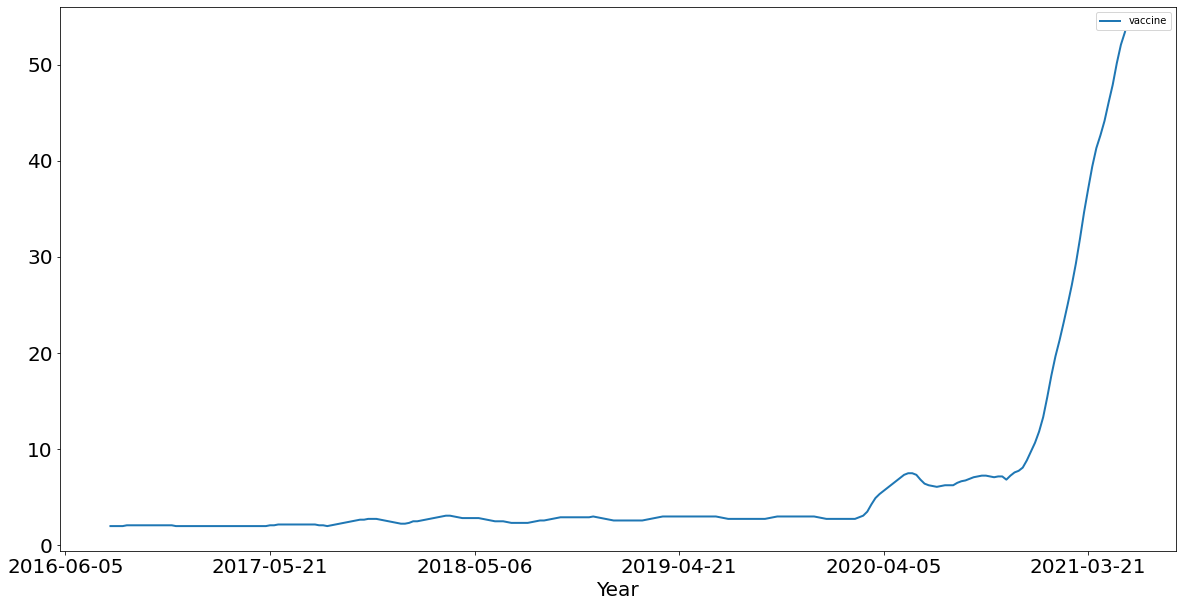

In [13]:
vaccine = df[['vaccine']]
vaccine.rolling(12).mean().plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20);

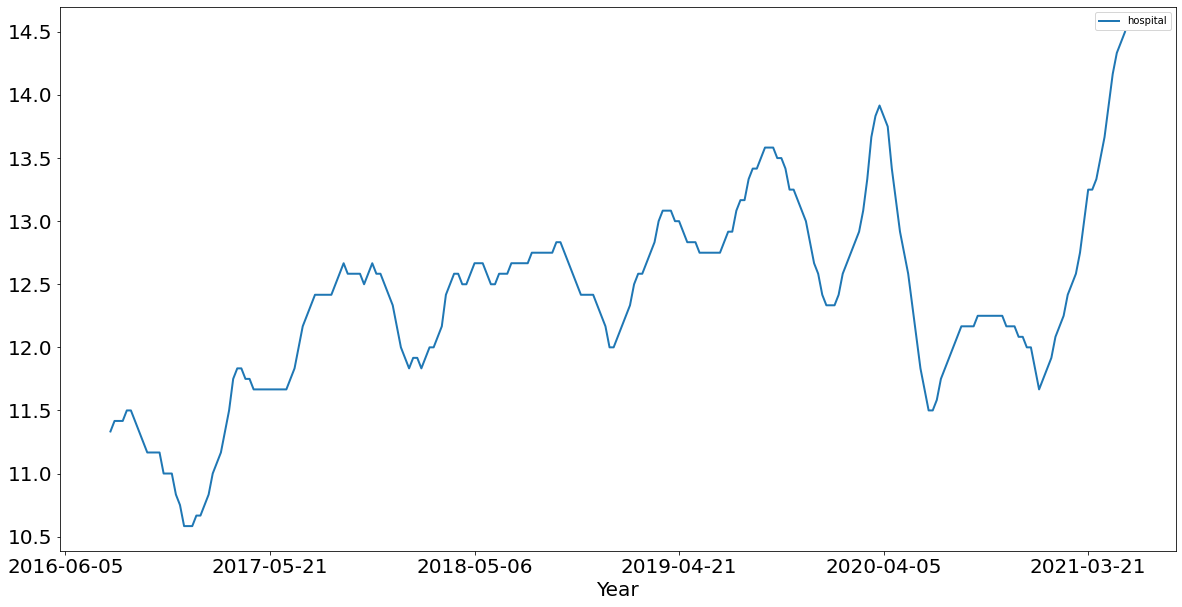

In [14]:
hospital = df[['hospital']]
hospital.rolling(12).mean().plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20);

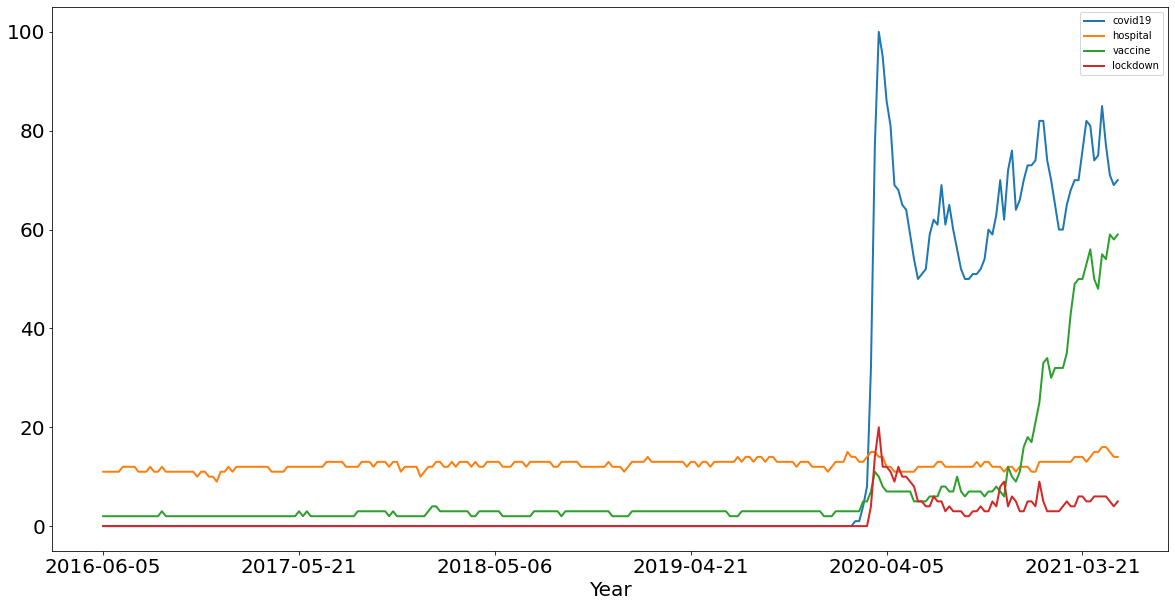

In [15]:
df.plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Year', fontsize=20);

We can see from the above that, people use to search **hospital** on Google all these time. However, untill **2020**, people were not searching on Google for anything relating to **Covid19** or **Lockdown**, and that is because **Covid19** and **Lockdown** noise started in the year 2020 onwards. From the year April, 2020 onwards, people began to search more on Google for queries relating to Covid19 and Vaccine and that is why you can see their respective graphs shooting upwards like that. The search for queries relating to Lockdown also arosed and fell due to the fact that governments impose the lockdown and relaese when things become better.

## Seasonal Patterns in Time Series Data

One way to think about the seasonal components to the time series of your data is to remove the trend from a time series, so that you can more easily investigate seasonality. To remove the trend you can use what is called "differencing", where you look at the difference between successive data points (called "first-order differencing", because you're only looking at the difference between one data point and the one before it).

You can use pandas and the diff() and plot() methods to compute and plot the first order difference of the 'hospital' Series:

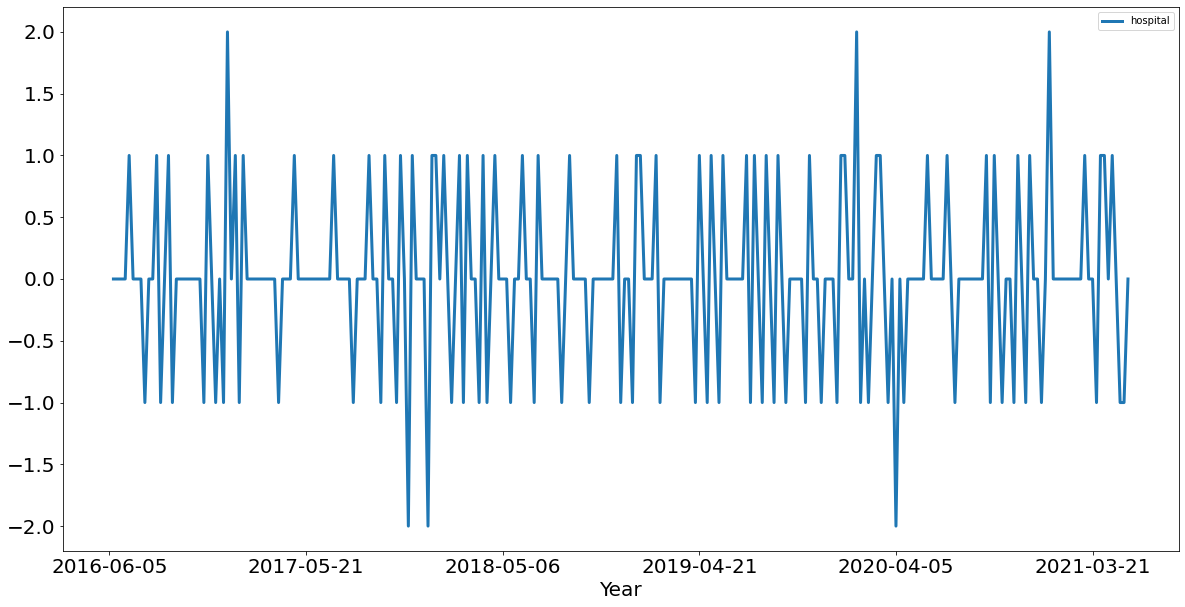

In [16]:
hospital.diff().plot(figsize=(20,10), linewidth=3, fontsize=20)
plt.xlabel('Year', fontsize=20);

## Correlations

In [17]:
df.corr()

,covid19,hospital,vaccine,lockdown
covid19,1.000000,0.195934,0.692722,0.879561
hospital,0.195934,1.000000,0.443952,0.140870
vaccine,0.692722,0.443952,1.000000,0.471178
lockdown,0.879561,0.140870,0.471178,1.000000


We can see from the above correlation matrix that covid19 and lockdown are highly correlated, about 0.87 followed by covid19 and vaccine, about 0.69

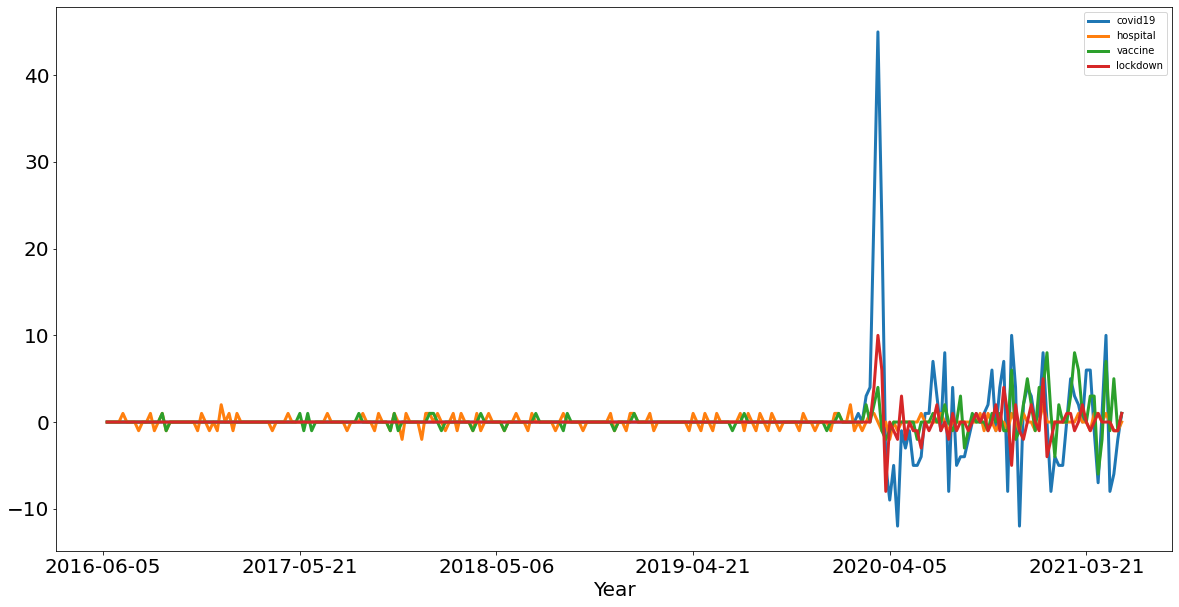

In [18]:
df.diff().plot(figsize=(20,10), linewidth=3, fontsize=20)
plt.xlabel('Year', fontsize=20);

The correlation matrix is also reflected above. As blue line(covid19) goes up, we see both the green(vaccine) and red(lockdown) going up as well and vice-versa.

___

<p style="text-align:right;">
    <em>Content Copyrighted by Puneett Bhatnagr</em>
</p>